# 1. Hafta Özet

**İlk hafta,**

* Dijital görüntülerin sadece birer "resim" olarak değil, içerisinde sayısal veriler barındıran matrisler olarak tanımlamıştık.

* Gri Seviye Görüntü - Renkli Görüntü (RGB)

* Piksel, Kanal, Yoğunluk kavramları

* Çözünürlük ve Boyut Kavramları

* Veri Tipleri (uint8 (0–255), float (0–1 arası))

* Görüntü İşleme

# 2. Hafta



**Bu hafta,** ise dijital görüntüler üzerinde matematiksel işlemler yaparak **Renk Uzayları**nı derinlemesine ele alacağız.

# Gerekli Kütüphaneler


In [23]:
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt

from skimage import data, color
from skimage import exposure

# Orijinal Görüntü
Önce hazır bir örnek görüntü (RGB) yükleyelim.


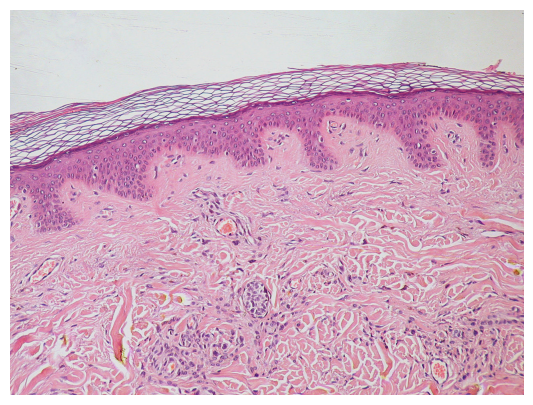

In [24]:
# Scientific İmages -> Skin
img = data.skin()
plt.imshow(img)
plt.axis("off")
plt.show()

## Görüntünün Boyutları

Önceki dersimizde bahsettiğimiz gibi görüntünün boyutlarını "shape" komutu ile görebiliriz.


In [25]:
print("shape:", img.shape)

shape: (960, 1280, 3)


## Görüntüdeki Veri Tipi

In [26]:
print("dtype:", img.dtype)

dtype: uint8


In [27]:
print("min/max:", img.min(), img.max())

min/max: 0 255


## Görüntü Matrisi

RGB: Görüntü, her biri 8-bit (0-255) olan üç ana kanalın birleşimidir.

In [29]:
data = asarray(img)
print(data)

[[[219 215 216]
  [219 215 216]
  [220 216 217]
  ...
  [202 203 198]
  [202 203 198]
  [200 201 195]]

 [[217 219 218]
  [217 219 218]
  [215 219 218]
  ...
  [194 189 186]
  [201 196 193]
  [207 202 198]]

 [[211 220 217]
  [211 220 217]
  [211 220 217]
  ...
  [210 200 201]
  [210 200 199]
  [209 199 198]]

 ...

 [[226 222 211]
  [226 215 209]
  [226 201 205]
  ...
  [181 103 129]
  [180  98 134]
  [183 100 142]]

 [[227 218 219]
  [233 218 225]
  [225 198 215]
  ...
  [174 112 135]
  [161  97 132]
  [154  89 131]]

 [[229 217 229]
  [239 222 240]
  [227 198 228]
  ...
  [195 144 163]
  [166 115 148]
  [144  91 133]]]


# Gri Görüntü

In [30]:
gray_img = color.rgb2gray(img)

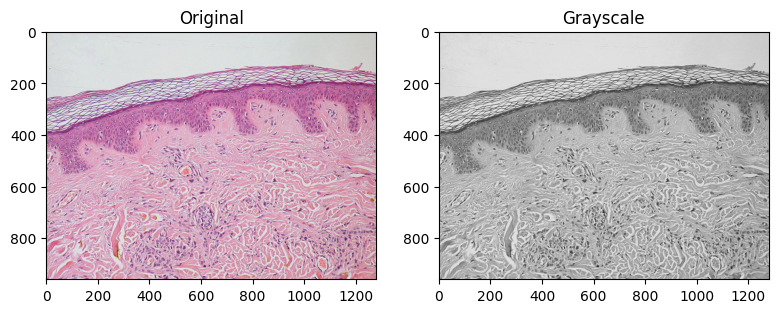

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

## Görüntünün Boyutları

In [32]:
print("shape:", gray_img.shape)

shape: (960, 1280)


## Görüntüdeki Veri Tipi

In [33]:
print("dtype:", gray_img.dtype)

dtype: float64


In [34]:
print("min/max:", gray_img.min(), gray_img.max())

min/max: 0.008422745098039214 1.0


## Görüntü Matrisi

In [35]:
gray_data = asarray(gray_img)
print(gray_data)

[[0.84675333 0.84675333 0.8506749  ... 0.79383137 0.79383137 0.78570549]
 [0.85687412 0.85687412 0.85520745 ... 0.7444949  0.77194588 0.79519255]
 [0.85439686 0.85439686 0.85439686 ... 0.7929298  0.79236431 0.78844275]
 ...
 [0.87081137 0.85060745 0.81019961 ... 0.47627294 0.46282588 0.47319882]
 [0.86268471 0.86938118 0.80377725 ... 0.49738549 0.44362157 0.41506157]
 [0.86437333 0.88984431 0.80911961 ... 0.61257804 0.50281098 0.41290471]]


# Görüntü üzerinde matris işlemleri

## Görüntü Negatifi

Görüntüdeki siyah kısımları beyaz, beyaz kısımları siyah yapar. Özellikle medikal görüntülerde (Mamografi, X-Ray) detayların seçilmesini sağlar.

Formül: $negative = (L - 1) - image$  
        $negative = 255 - image$

   
(L: Maksimum yoğunluk değeri)

In [37]:
img_negatif = 255 - img

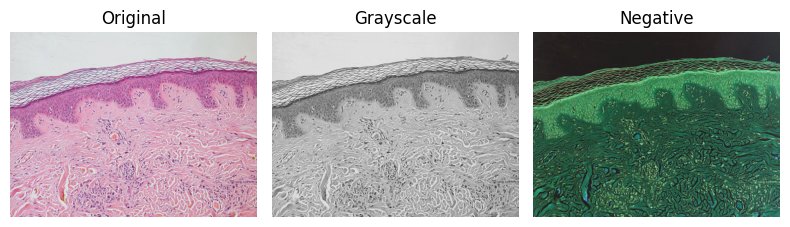

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original", fontsize=12)
ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale", fontsize=12)
ax[2].imshow(img_negatif)
ax[2].set_title("Negative", fontsize=12)

for i in range(0, len(ax)):
    ax[i].axis('off')

fig.tight_layout()
plt.show()

## Logaritmik Dönüşüm
Görüntüdeki çok düşük yoğunluklu (karanlık) alanlardaki detayları genişletmek (parlatmak) için kullanılır.

Formül: $s = c \cdot \log(1 + r)$


In [47]:
# Logarithmic
logarithmic_img = exposure.adjust_log(img, 1)

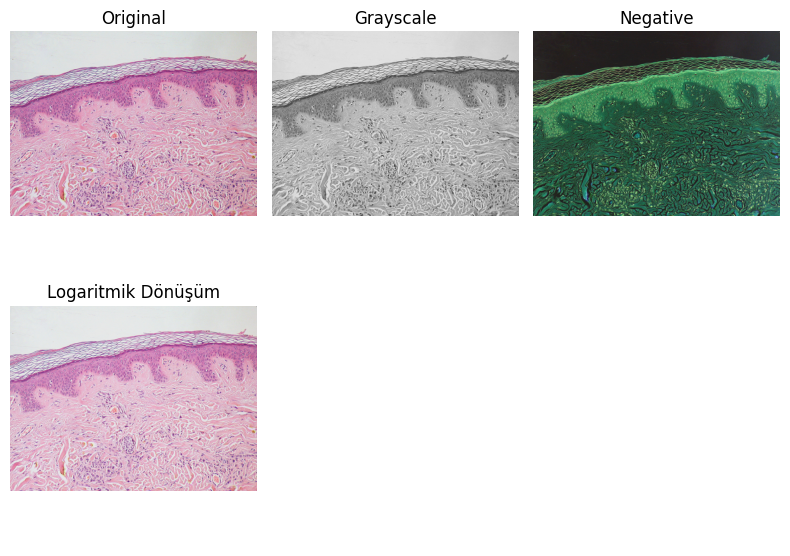

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original", fontsize=12)

ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale", fontsize=12)

ax[2].imshow(img_negatif)
ax[2].set_title("Negative", fontsize=12)

ax[3].imshow(logarithmic_img)
ax[3].set_title("Logaritmik Dönüşüm", fontsize=12)

# Kullanılmayan alt grafikleri gizle
for i in range(0, len(ax)):
    ax[i].axis('off')

fig.tight_layout()
plt.show()

## Gama Dönüşümü
Görüntünün kontrastını ve parlaklığını dinamik olarak ayarlar.

Tıbbi ekranların kalibrasyonunda kritiktir.

Formül: $s = c \cdot r^\gamma$

$\gamma < 1$: Görüntü parlar,
$\gamma > 1$: Görüntü kararır (kontrast artar).

In [50]:
gamma_img = exposure.adjust_gamma(img, 2)

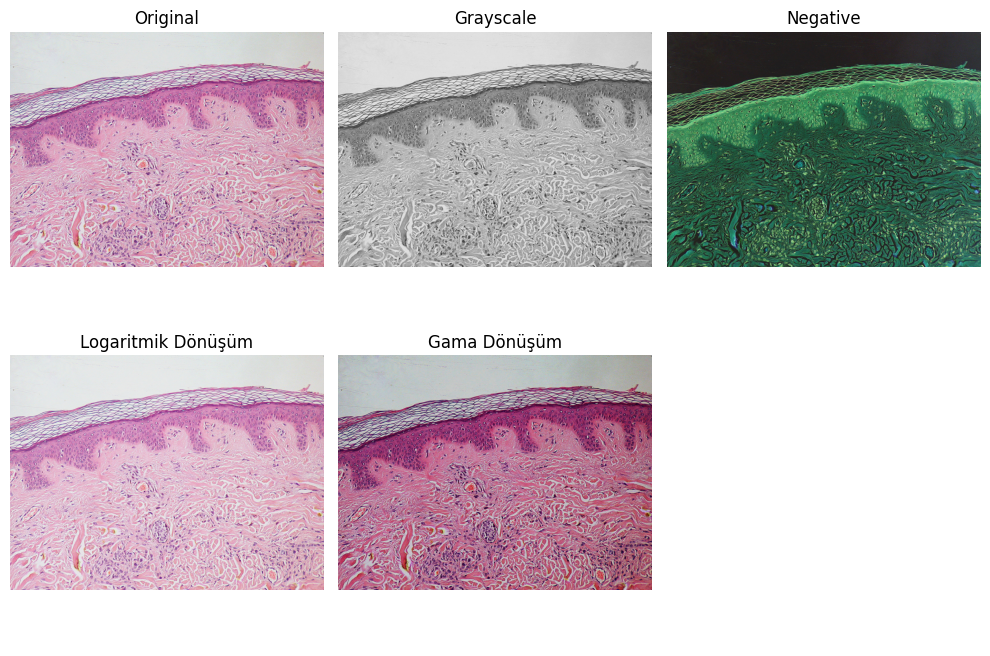

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original", fontsize=12)

ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale", fontsize=12)

ax[2].imshow(img_negatif)
ax[2].set_title("Negative", fontsize=12)

ax[3].imshow(logarithmic_img)
ax[3].set_title("Logaritmik Dönüşüm", fontsize=12)

ax[4].imshow(gamma_img)
ax[4].set_title("Gama Dönüşüm", fontsize=12)

for i in range(0, len(ax)):
    ax[i].axis('off')

fig.tight_layout()
plt.show()

## Sigmoid Dönüşüm

Sigmoid dönüşüm, görüntü yoğunluklarını S-şeklinde (logistik eğri) dönüştürür.

Matematiksel formül:

$O=1/1+egain⋅(cutoff−I)$

Sigmoid dönüşüm:

* Belirli bir yoğunluk aralığını vurgular,

* Çok karanlık ve çok aydınlık bölgeleri baskılar,

* Orta tonlarda kontrastı artırır.

In [52]:
sigmoid_img = exposure.adjust_sigmoid(img,
                                      cutoff=0.5,   # merkez yoğunluk
                                      gain=10       # kontrast gücü
                                      )

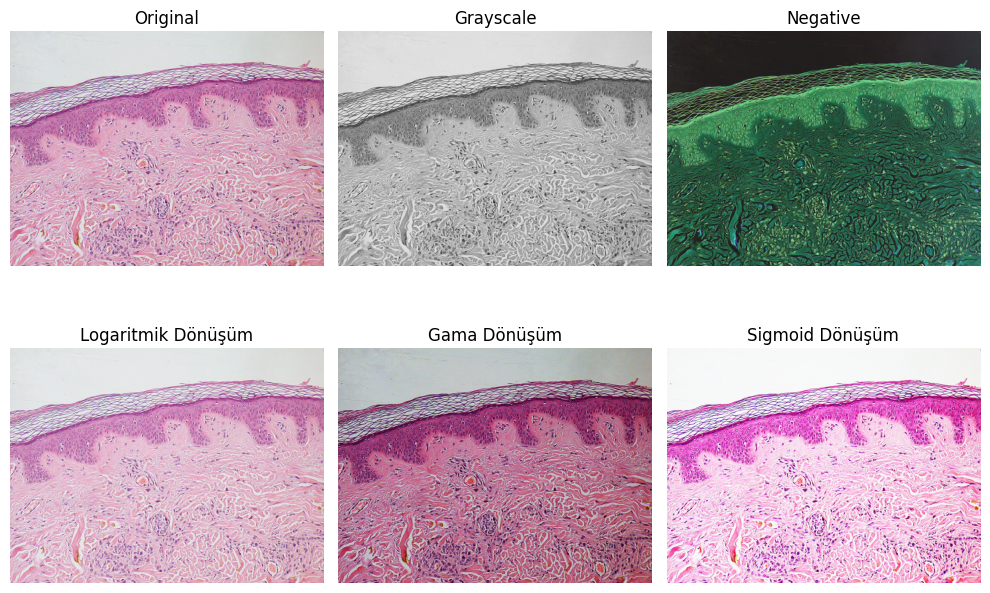

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original", fontsize=12)

ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale", fontsize=12)

ax[2].imshow(img_negatif)
ax[2].set_title("Negative", fontsize=12)

ax[3].imshow(logarithmic_img)
ax[3].set_title("Logaritmik Dönüşüm", fontsize=12)

ax[4].imshow(gamma_img)
ax[4].set_title("Gama Dönüşüm", fontsize=12)

ax[5].imshow(sigmoid_img)
ax[5].set_title("Sigmoid Dönüşüm", fontsize=12)

for i in range(0, len(ax)):
    ax[i].axis('off')

fig.tight_layout()
plt.show()

📌 Log dönüşüm → karanlıkları açar.

📌 Gamma → genel parlaklığı değiştirir.

📌 Sigmoid → seçili bir aralıkta kontrastı artırır.

# Histogram

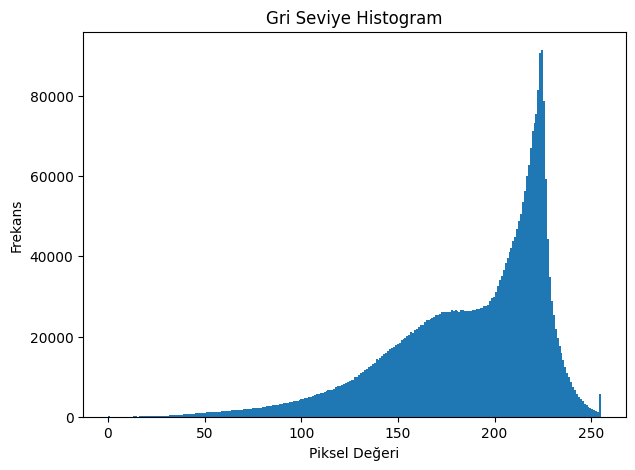

In [61]:
plt.hist(img.flatten(), bins=256, range=(0,255))
plt.title("Gri Seviye Histogram")
plt.xlabel("Piksel Değeri")
plt.ylabel("Frekans")
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original", fontsize=12)

ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale", fontsize=12)

ax[2].imshow(img_negatif)
ax[2].set_title("Negative", fontsize=12)

ax[3].imshow(logarithmic_img)
ax[3].set_title("Logaritmik Dönüşüm", fontsize=12)

ax[4].imshow(gamma_img)
ax[4].set_title("Gama Dönüşüm", fontsize=12)

ax[5].imshow(sigmoid_img)
ax[5].set_title("Sigmoid Dönüşüm", fontsize=12)

for i in range(0, len(ax)):
    ax[i].axis('off')

fig.tight_layout()
plt.show()

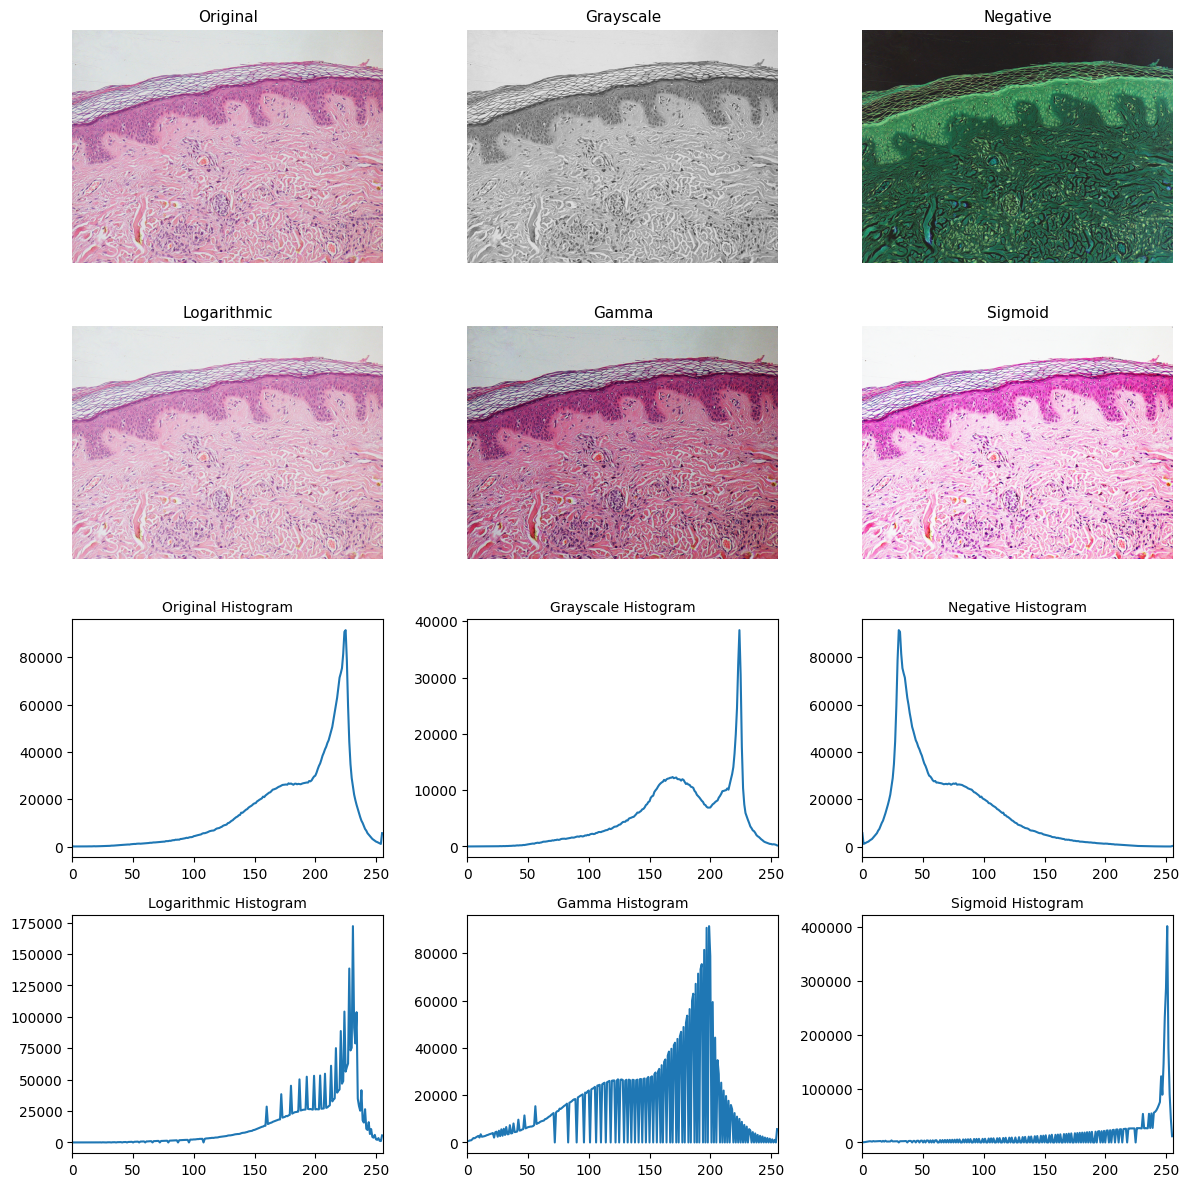

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# 4 satır, 3 sütun
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
ax = axes.ravel()

images = [
    img,
    gray_img,
    img_negatif,
    logarithmic_img,
    gamma_img,
    sigmoid_img
]

titles = [
    "Original",
    "Grayscale",
    "Negative",
    "Logarithmic",
    "Gamma",
    "Sigmoid"
]

# --- GÖRÜNTÜLER ---
for i in range(6):
    ax[i].imshow(images[i], cmap='gray' if len(images[i].shape)==2 else None)
    ax[i].set_title(titles[i], fontsize=11)
    ax[i].axis("off")

# --- HİSTOGRAMLAR ---
for i in range(6):
    hist, bins = np.histogram(images[i].flatten(), bins=256)
    ax[i+6].plot(hist)
    ax[i+6].set_title(titles[i] + " Histogram", fontsize=10)
    ax[i+6].set_xlim([0, 256])

plt.tight_layout()
plt.show()


# RGB'den HSV'ye Geçiş

HSV (Hue, Saturation, Value): (Ton, Doygunluk, Değer)

Neden RGB Yerine HSV kullanmak isteriz?

RGB renk uzayında:

* R (Red)

* G (Green)

* B (Blue)

kanalları birlikte rengi ve parlaklığı ifade eder.

👉 Problem: Aydınlatma değiştiğinde (ışık, gölge) RGB değerleri ciddi şekilde değişir. Segmentasyon zorlaşır.

HSV Temsili

HSV renk uzayı, insan görme algısına daha yakındır:

* H – Hue (Renk tonu)
→ “Bu piksel hangi renkte?”

* S – Saturation (Doygunluk)
→ “Renk ne kadar saf / soluk?”

* V – Value (Parlaklık)
→ “Ne kadar aydınlık / karanlık?”

👉 Avantaj: Renk bilgisi (H) ve parlaklık (V) ayrı kanallardadır. Bu da segmentasyonu çok daha kolay hale getirir.

Bir görüntüde:

* Nesneler genellikle farklı renklere (Hue) sahiptir

* Aydınlatma değişse bile Hue büyük oranda sabit kalır

Bu nedenle:

> RGB’de karmaşık olan ayrım, HSV’de tek bir kanalın eşiklenmesi (thresholding) ile yapılabilir.


📌 Temel fikir:

“Nesneyi ayırmak için tüm RGB’yi değil,
sadece Hue veya Value kanalını eşikle.”

In [54]:
hsv = color.rgb2hsv(img)

H_img = hsv[:, :, 0]   # Hue
S_img = hsv[:, :, 1]   # Saturation
V_img = hsv[:, :, 2]   # Value

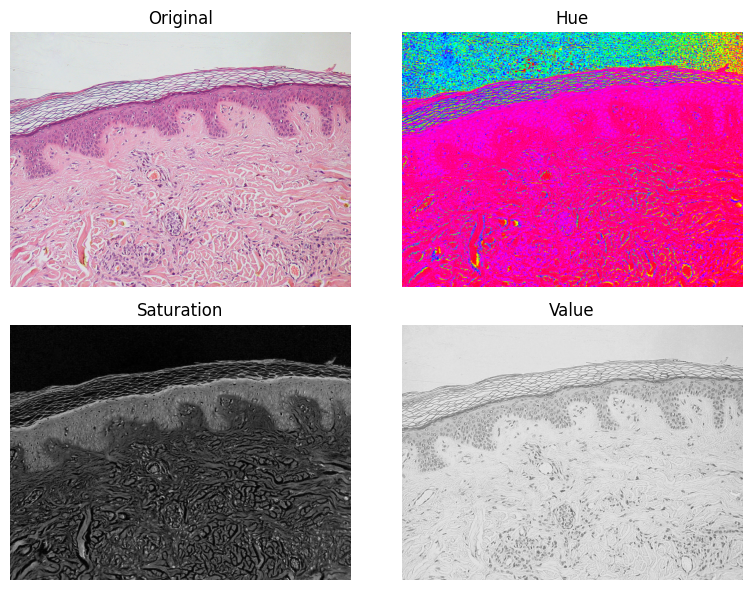

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original", fontsize=12)
ax[1].imshow(H_img, cmap='hsv')
ax[1].set_title("Hue", fontsize=12)
ax[2].imshow(S_img, cmap='gray')
ax[2].set_title("Saturation", fontsize=12)
ax[3].imshow(V_img, cmap='gray')
ax[3].set_title("Value", fontsize=12)

for i in range(0, len(ax)):
    ax[i].axis('off')

fig.tight_layout()
plt.show()

📌 Dikkat:

* Hue → renk ayrımı için ideal

* Value → aydınlık / karanlık bölgeler

* Saturation → soluk / baskın renkler

## HSV Üzerinden Basit Segmentasyon

Amaç:

* Belirli bir renk aralığını (Hue) ayırmak

* Arka planı bastırmak

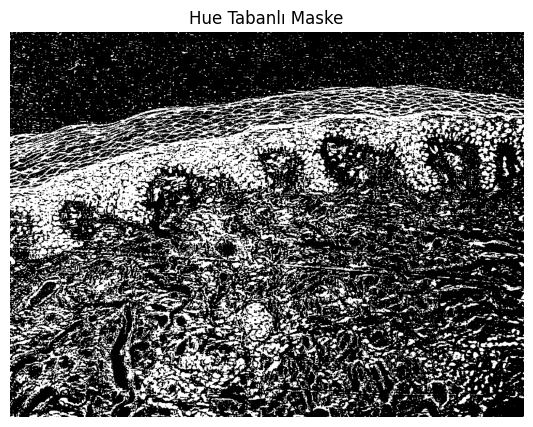

In [57]:
# Örnek: belirli bir Hue aralığını seç
lower_hue = 0.7
upper_hue = 0.9

mask = (H_img >= lower_hue) & (H_img <= upper_hue)
plt.imshow(mask, cmap='gray')
plt.title("Hue Tabanlı Maske")
plt.axis("off")
plt.show()

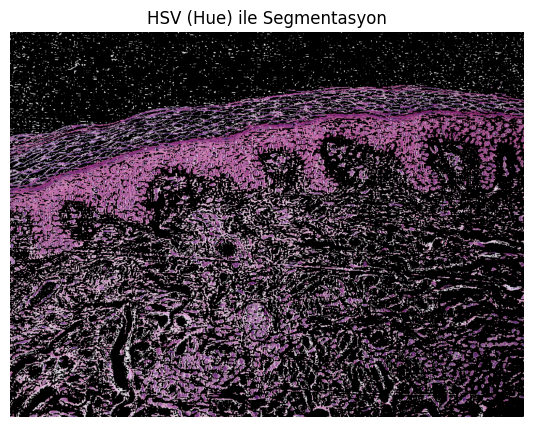

In [58]:
segmented = img.copy()
segmented[~mask] = 0   # maske dışını siyah yap

plt.imshow(segmented)
plt.title("HSV (Hue) ile Segmentasyon")
plt.axis("off")
plt.show()
